# Ejercicio - Busqueda de Alojamiento en Airbnb.

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [2]:
import pandas as pd
df_airbnb = pd.read_csv("./src/input/airbnb.csv")

In [7]:
df_airbnb.head(10)

room_id  host_id        room_type       neighborhood  reviews  \
0     6499    14455  Entire home/apt              Belém        8   
1    17031    66015  Entire home/apt           Alvalade        0   
2    25659   107347  Entire home/apt  Santa Maria Maior       63   
3    29248   125768  Entire home/apt  Santa Maria Maior      225   
4    29396   126415  Entire home/apt  Santa Maria Maior      132   
5    29720   128075  Entire home/apt            Estrela       14   
6    29872   128698  Entire home/apt          Alcântara       25   
7    29891   128792  Entire home/apt       Misericórdia       28   
8    29915   128890  Entire home/apt     Avenidas Novas       28   
9    33312   144398  Entire home/apt       Misericórdia       24   

   overall_satisfaction  accommodates  bedrooms   price  
0                   5.0             2       1.0    57.0  
1                   0.0             2       1.0    46.0  
2                   5.0             3       1.0    69.0  
3                   4.5             4       1.0    58.0  
4                   5.0             4       1.0    67.0  
5                   5.0            16       9.0  1154.0  
6                   5.0             2       1.0    75.0  
7                   5.0             3       1.0    49.0  
8                   4.5             3       1.0    58.0  
9                   4.5             4       1.0    66.0

In [6]:
df_airbnb.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object

En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Usando Pandas

### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [18]:
# Consejo: para mostrar 3 alternativas emplee head(3)
import pandas as pd
df_airbnb = pd.read_csv("./src/input/airbnb.csv")

dfa=df_airbnb

df_filter = dfa[(dfa.reviews > 10 ) & (dfa.accommodates == 3) & (dfa.overall_satisfaction > 4) & (dfa.room_type =='Private room')]
filt=df_filter

f_sort= filt.sort_values(by=["reviews","overall_satisfaction"], ascending =[True, True])
f_sort.head(3)

room_id   host_id     room_type       neighborhood  reviews  \
5733    9660606  37220008  Private room            Arroios       11   
10104  16295226   4132827  Private room             Lumiar       11   
10109  16298245  51013574  Private room  Santa Maria Maior       11   

       overall_satisfaction  accommodates  bedrooms  price  
5733                    4.5             3       1.0   39.0  
10104                   4.5             3       1.0   33.0  
10109                   5.0             3       1.0   52.0

### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [44]:
import pprint 
import pandas as pd
df_airbnb = pd.read_csv("./src/input/airbnb.csv")

dfa1=df_airbnb
df_filt2=dfa1[(dfa1.room_id == 97503) | (dfa1.room_id==90387)]

rob=pd.DataFrame(df_filt2)
rob.head()

rob.to_excel('roberto.xlsx',index=False)


### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [62]:
import pandas as pd
df_airbnb = pd.read_csv("./src/input/airbnb.csv")

dfa=df_airbnb

df_filter = dfa[(dfa.price < 16 ) & (dfa.room_type == 'Shared room')]
d1=df_filter.sort_values(by='overall_satisfaction',ascending=False)
d1.head(10)

room_id   host_id    room_type    neighborhood  reviews  \
9065  14933182  91501272  Shared room   Santo António        5   
7060  12299998  66077974  Shared room         Arroios       49   
8918  14719962  40574313  Shared room  Avenidas Novas        4   
6056  10397682  32344156  Shared room    Misericórdia       15   
7066  12305540  66077974  Shared room         Arroios       40   
9062  14932518  91501272  Shared room   Santo António        7   
9061  14932515  91501272  Shared room   Santo António        9   
8908  14708916  91501272  Shared room   Santo António       18   
8897  14702408  40574313  Shared room  Avenidas Novas       14   
8385  14068386  84472028  Shared room     São Vicente       17   

      overall_satisfaction  accommodates  bedrooms  price  
9065                   5.0             8       1.0   11.0  
7060                   5.0             1       1.0   13.0  
8918                   5.0             4       1.0   13.0  
6056                   5.0             8       1.0   13.0  
7066                   5.0             1       1.0   13.0  
9062                   4.5             4       1.0   11.0  
9061                   4.5             4       1.0   11.0  
8908                   4.5             4       1.0   11.0  
8897                   4.5             4       1.0   13.0  
8385                   4.5             1       1.0   12.0

## Usando MatPlot

In [63]:
from IPython.display import Image
Image("./img/chart-chooser-data-visualization.png")

import matplotlib.pyplot as plt

In [64]:
%matplotlib inline

### Caso 1.

Realizar un gráfico circular, de la cantidad de tipo de habitaciones `room_type`  

<Axes: ylabel='room_type'>

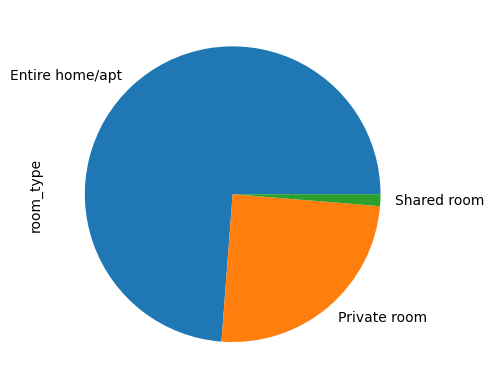

In [67]:
import pandas as pd
df_airbnb = pd.read_csv("./src/input/airbnb.csv")

df_airbnb.room_type.value_counts().plot.pie()